In [52]:
import pandas as pd
import numpy as np
import shap
import transformers

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [5]:
shap.initjs()

In [2]:
sales = pd.read_csv("./data/Advertising Budget and Sales.csv", index_col=0)
sales

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [6]:
y = sales["Sales ($)"]

In [7]:
X = sales.drop("Sales ($)", axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

In [9]:
rfr = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=5)

In [10]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=12345)

In [11]:
explainer = shap.TreeExplainer(rfr)
explainer

In [67]:
print(shap_train.shape)  # (samples, features, ...)
print(X_train.shape)  # (samples, features)

(160, 3)
(160, 3)


In [13]:
shap_train = explainer.shap_values(X_train)

In [14]:
shap_test = explainer.shap_values(X_test)

In [19]:
shap_train_df = pd.DataFrame(
    shap_train, columns=["TV", "Radio", "Newspaper"], index=X_train.index
)
shap_test_df = pd.DataFrame(
    shap_test, columns=["TV", "Radio", "Newspaper"], index=X_test.index
)

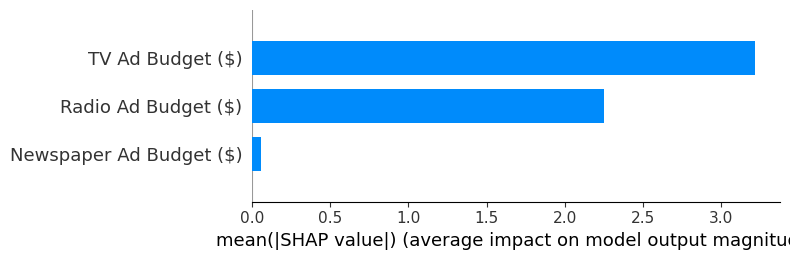

In [20]:
# feature importance에 한없이 비슷한 값
shap.summary_plot(shap_train, X_train, plot_type="bar")

In [65]:
shap_train

array([[ 2.97346876e+00,  1.48583281e+00, -2.43251811e-02],
       [ 2.33700742e+00, -1.09042881e+00,  4.93302387e-03],
       [ 1.01015727e+00,  2.24669492e+00, -2.34836437e-02],
       [ 3.83068391e+00, -1.38029138e+00,  5.96835865e-02],
       [ 4.06915395e+00,  1.92065875e+00, -2.39267000e-02],
       [ 4.55796850e+00,  3.95198412e+00, -9.02220757e-03],
       [ 2.99346136e+00, -7.33986875e-01, -1.95618838e-02],
       [-8.69951853e+00,  7.81041759e-01, -9.92419807e-02],
       [ 4.06616562e+00,  1.16627381e+00, -2.34334880e-02],
       [-1.93763400e+00, -2.48810356e+00, -9.24164106e-02],
       [-3.13030382e+00, -2.16247146e+00, -5.93674439e-02],
       [ 8.34482166e-01, -4.37867592e+00, -2.03521189e-02],
       [ 7.67457624e-01,  8.18661175e-02,  6.93530129e-03],
       [ 3.59358953e+00,  1.78030587e+00,  6.40988808e-02],
       [ 1.66989519e+00, -3.19802243e+00,  3.68455344e-02],
       [ 4.77114285e+00,  1.28294272e+00,  4.29503585e-03],
       [ 1.13709806e+00, -3.95846100e-01

In [66]:
X_train

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
71,199.1,30.6,38.7
155,187.8,21.1,9.5
195,149.7,35.6,6.0
34,265.6,20.0,0.3
105,238.2,34.3,5.3
...,...,...,...
127,7.8,38.9,50.6
170,284.3,10.6,6.4
165,117.2,14.7,5.4
130,59.6,12.0,43.1


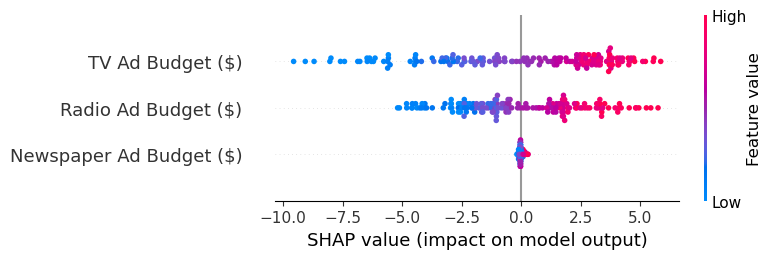

In [21]:
# 이것만으로 어느정도 관계를 볼 수 있음
shap.summary_plot(shap_train, X_train)

<Axes: xlabel='TV Ad Budget ($)', ylabel='Sales ($)'>

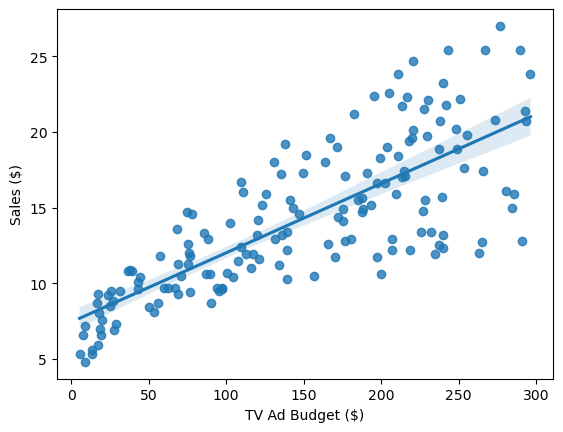

In [23]:
sns.regplot(x=X_train["TV Ad Budget ($)"], y=y_train)

<Axes: xlabel='Radio Ad Budget ($)', ylabel='Sales ($)'>

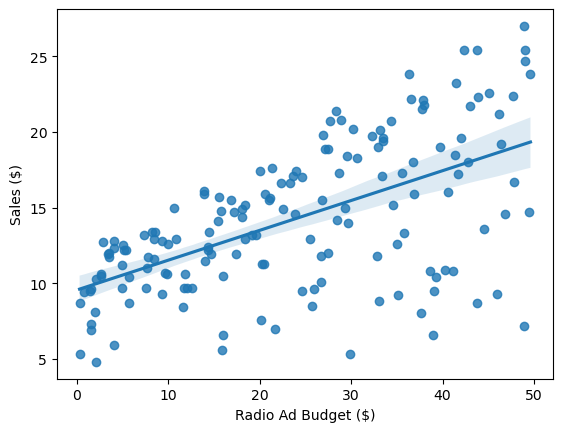

In [24]:
sns.regplot(x=X_train["Radio Ad Budget ($)"], y=y_train)

<Axes: xlabel='Newspaper Ad Budget ($)', ylabel='Sales ($)'>

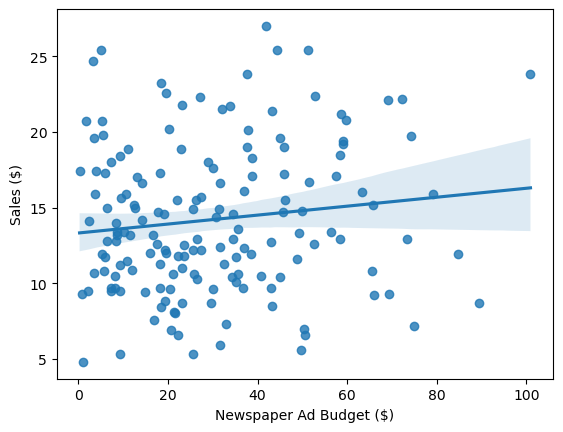

In [25]:
sns.regplot(x=X_train["Newspaper Ad Budget ($)"], y=y_train)

가격이 무한정 오른다고 판매량이 많아지는게 아님, 어느정도까지 올리는 게 적당한가?

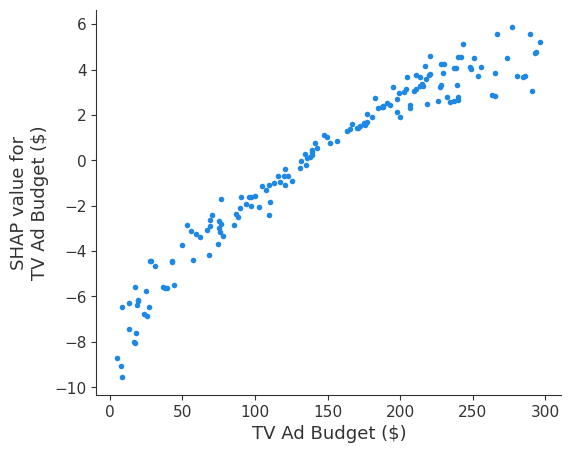

In [26]:
shap.dependence_plot("TV Ad Budget ($)", shap_train, X_train, interaction_index=None)

해당 그래프에서 편미분을 했을때 기울기가 급격히 줄어드는 시점이 효율이 가장 좋은 지점이라고 이야기해볼 수 있음.

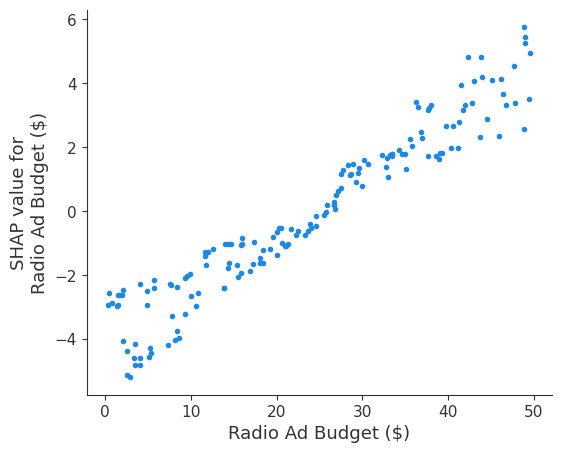

In [27]:
shap.dependence_plot("Radio Ad Budget ($)", shap_train, X_train, interaction_index=None)

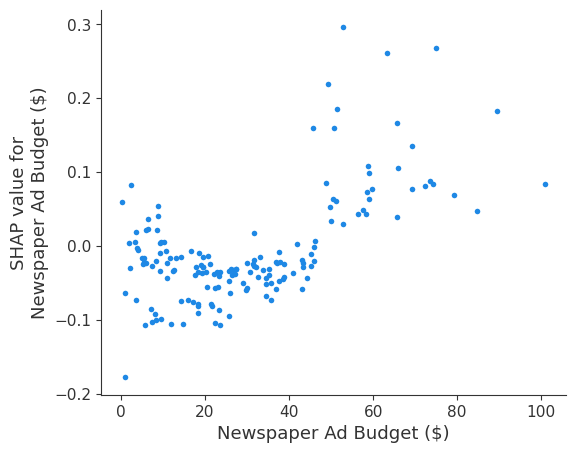

In [29]:
shap.dependence_plot(
    "Newspaper Ad Budget ($)", shap_train, X_train, interaction_index=None
)

신문의 경우 비율을 확대하는 것은 말도 안되는 것을 알 수 있다.

In [31]:
interaction = explainer.shap_interaction_values(X_train)
interaction

array([[[ 2.94370596e+00,  2.41509305e-02,  5.61187063e-03],
        [ 2.41509305e-02,  1.46063230e+00,  1.04957917e-03],
        [ 5.61187063e-03,  1.04957917e-03, -3.09866309e-02]],

       [[ 2.54893529e+00, -2.40881806e-01,  2.89539371e-02],
        [-2.40881806e-01, -8.60860766e-01,  1.13137632e-02],
        [ 2.89539371e-02,  1.13137632e-02, -3.53346764e-02]],

       [[ 9.81188380e-01, -1.53583585e-03,  3.05047279e-02],
        [-1.53583585e-03,  2.26337670e+00, -1.51459452e-02],
        [ 3.05047279e-02, -1.51459452e-02, -3.88424263e-02]],

       ...,

       [[-1.51490799e+00,  5.71314008e-01, -2.03211182e-03],
        [ 5.71314008e-01, -1.61937185e+00,  2.74390791e-02],
        [-2.03211182e-03,  2.74390791e-02, -4.73094676e-02]],

       [[-4.03435315e+00,  8.05694753e-01, -1.93489133e-02],
        [ 8.05694753e-01, -2.07946720e+00,  2.05784515e-03],
        [-1.93489133e-02,  2.05784515e-03, -4.16455738e-02]],

       [[-3.01708440e+00,  6.34714476e-01, -8.88178931e-03],
 

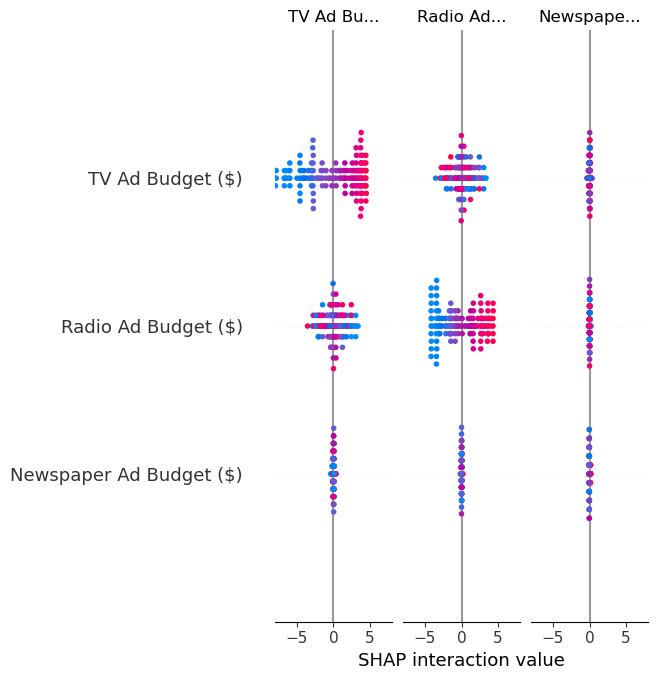

In [32]:
shap.summary_plot(interaction, X_train)

tv,라디오 사이에는 연관이 있는 것처럼 보임

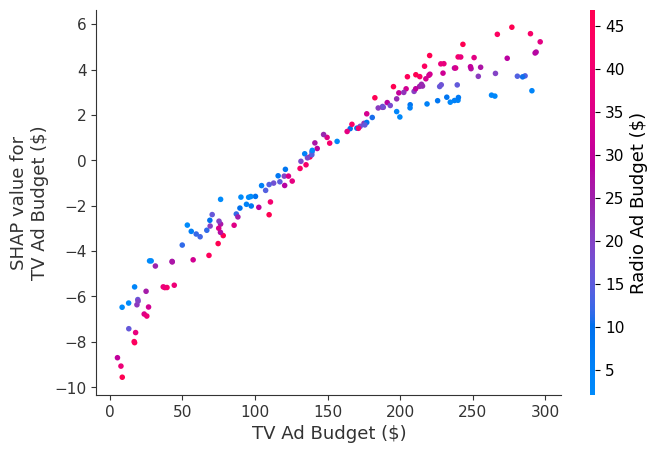

In [35]:
shap.dependence_plot("TV Ad Budget ($)", shap_train, X_train, interaction_index="auto")

In [59]:
shap.force_plot(
    explainer.expected_value,
    shap_train[1],
    features=X_train.iloc[1],
    feature_names=X_train.columns,
)

In [ ]:
X_train

In [60]:
# 여기서 값을 비교해가며 위의 포스플랏의 인덱싱을 조절하며 그래프를 보자
y_train

71     18.3
155    15.6
195    17.3
34     17.4
105    20.7
       ... 
127     6.6
170    15.0
165    11.9
130     9.7
30     10.5
Name: Sales ($), Length: 160, dtype: float64

In [61]:
shap.force_plot(
    explainer.expected_value,
    shap_train[-5],
    features=X_train.iloc[-5],
    feature_names=X_train.columns,
)

이땐 티비 부분이 낮은 구간이 더 긺으로 티비 부분을 늘리는 것이 전략상 더 괜찮다

## LIME, Feature importance, Permutaion importance

xgboost

In [37]:
import xgboost

In [38]:
X, y = shap.datasets.california()

In [39]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [41]:
xgb = xgboost.XGBRegressor()
xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
explainer = shap.Explainer(xgb)
shap_value = explainer(X)
shap_value

.values =
array([[ 1.7081785 ,  0.09363674,  0.19277047, ...,  0.01571906,
        -0.39385185,  0.55515116],
       [ 1.426717  ,  0.03108795,  0.00601703, ...,  0.2112088 ,
        -0.36280793,  0.5884698 ],
       [ 1.3600677 ,  0.16082455,  0.47361216, ..., -0.02257477,
        -0.5582292 ,  0.5463798 ],
       ...,
       [-0.5842778 ,  0.01744973, -0.0949486 , ...,  0.10111337,
        -0.9798146 ,  0.3479332 ],
       [-0.6035651 ,  0.03118367, -0.05752674, ...,  0.23118298,
        -1.051862  ,  0.32962263],
       [-0.44976887,  0.02051439, -0.12479055, ..., -0.00343278,
        -0.85543966,  0.33553985]], dtype=float32)

.base_values =
array([2.0684865, 2.0684865, 2.0684865, ..., 2.0684865, 2.0684865,
       2.0684865], dtype=float32)

.data =
array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7

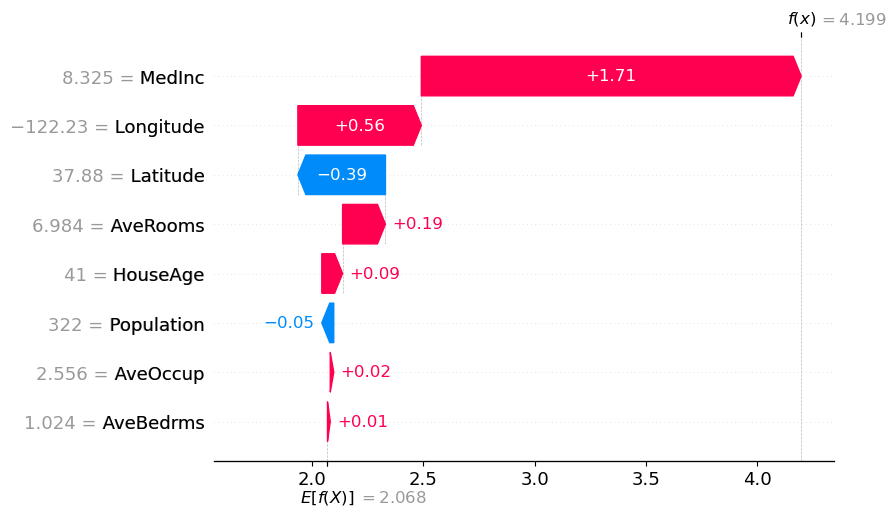

In [48]:
shap.waterfall_plot(shap_value[0])

글로벌 분석 : 모델이랑 X트레인 전체를 집어넣음

In [54]:
shap.force_plot(shap_value[:500])

로컬 분석:샘플하나가 어떤 영향을 주는가